In [1]:
def calculate_average_mass(df_row):
    sum_of_weights = 0

    for i in range(1,len(df_row)):
        sum_of_weights += float(df_row[i])
        average = sum_of_weights / (len(df_row) - 1)
    return "{:.4f}".format(average)

def rename_image(df_row):
    newname = df_row['Image'].replace("testname", "")

    return newname

def get_index(df_row):
    return df_row['Image'][:len(df_row['Image']) - 4]

In [19]:
weightsFileName = '/Users/pablo/Documents/Programacion/BlueberriesImageMassDataset/weightsBlueberries.txt'

import pandas as pd

df = pd.read_csv(weightsFileName, header=None, delim_whitespace=True)

df.rename(columns = {0:'Image'}, inplace = True)

df['AverageMass'] = df.apply(calculate_average_mass, axis=1)

df['Image'] = df.apply(rename_image, axis=1)

df['ID'] = df.apply(get_index, axis=1)

mass = pd.DataFrame().assign(Image=df['Image'], ID=df['ID'], AverageMass=df['AverageMass'])
mass['ID'] = mass['ID'].astype(int)
mass['AverageMass'] = mass['AverageMass'].astype(float)
#mass.to_json('massBlues.json', orient = 'split', compression = 'infer', index = 'true')
mass.head(10)
#latex_table = mass.head(10).to_latex(index=False, bold_rows=True, caption="Table of image Weighs and Average Mass")

#print(latex_table)



,Image,ID,AverageMass
0,21.jpg,21,10.2444
1,22.jpg,22,10.2427
2,23.jpg,23,10.2425
3,24.jpg,24,10.1629
4,25.jpg,25,10.1636
5,26.jpg,26,9.7124
6,27.jpg,27,9.7125
7,28.jpg,28,9.8781
8,29.jpg,29,9.8802
9,30.jpg,30,9.9806


In [36]:
IDAndMass = {}
for i in range(len(mass)):
    #print(mass.loc[i].at["ID"])
    IDAndMass[mass.loc[i].at["ID"]] = mass.loc[i].at["AverageMass"]

print(IDAndMass)

print(IDAndMass[21])


{21: 10.2444, 22: 10.2427, 23: 10.2425, 24: 10.1629, 25: 10.1636, 26: 9.7124, 27: 9.7125, 28: 9.8781, 29: 9.8802, 30: 9.9806, 31: 9.9795, 32: 9.1594, 33: 9.1617, 34: 10.8762, 35: 10.8735, 36: 10.8766, 37: 9.9834, 38: 9.9846, 39: 9.9304, 40: 9.9257, 41: 9.6898, 42: 9.6972, 43: 9.7016, 44: 11.9737, 45: 11.9794, 46: 8.7405, 47: 8.7423, 48: 9.1772, 49: 9.1813, 50: 9.4972, 51: 9.495, 52: 11.0753, 53: 11.0766, 54: 10.27, 55: 10.2695, 56: 11.5706, 57: 11.5745, 59: 8.7329, 60: 8.7356, 61: 10.2567, 62: 10.2568, 63: 10.213, 64: 10.2143, 65: 12.3145, 66: 12.3159, 67: 8.9281, 68: 8.9272, 70: 9.6905, 71: 9.6184, 72: 9.6184, 73: 10.6453, 74: 10.6412, 75: 8.8254, 76: 8.8253, 77: 9.9625, 78: 9.962, 79: 9.4596, 80: 9.4601, 81: 9.4612, 82: 10.532, 83: 10.5355, 84: 9.6529, 85: 9.6556, 86: 9.8557, 87: 9.8554, 88: 9.2088, 89: 9.2059, 90: 10.187, 91: 10.1867, 92: 10.0272, 93: 10.0269, 94: 9.3013, 95: 9.3014, 96: 11.002, 97: 9.5888, 98: 9.5873, 99: 9.7797, 100: 9.7792, 101: 9.6791, 102: 9.6792, 103: 10.6976,

In [33]:
import os
import glob
import cv2 #if you need to preprocess the images
import numpy as np
import re
from PIL import Image
from numpy import asarray

# Set the paths to your image and label directories
image_dir = "/Users/pablo/Documents/Programacion/BlueberriesImageMassDataset/Blueberries140/train/images"
regexpattern = r"testname(\d+)"

imagesdict = {}

for image_file in os.listdir(image_dir):
    #print(image_file)
    if image_file.endswith(".jpg"):
        image_path = os.path.join(image_dir, image_file)

        #image = cv2.imread(image_path)
        image = cv2.imread(image_path)

        imageID = re.search(regexpattern, image_file).group(0)[8:]
        imagesdict[imageID] = image

aux = {int(k):v for k,v in imagesdict.items()}
imagesdict = aux

#print(imagesdict)


idimages = list(imagesdict.keys())
idimages.sort()
sorted_dict = {i: imagesdict[i] for i in idimages}
imagesdict = sorted_dict
#print(imagesdict)

#imagesdf = pd.DataFrame.from_dict(images, orient='index')
#imagesdf.head(3)

   ID  AverageMass                                                img
0   1       4.8566  [[[133, 177, 201], [134, 178, 202], [139, 184,...
1   2       4.8568  [[[120, 164, 188], [124, 167, 191], [123, 167,...
2   3       4.8654  [[[131, 177, 201], [132, 178, 202], [130, 176,...
3   4       4.8691  [[[140, 180, 205], [143, 183, 208], [143, 183,...
4   5       4.8689  [[[144, 185, 208], [143, 184, 207], [140, 181,...


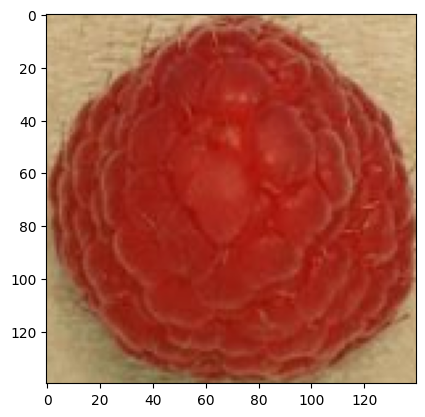

In [47]:
import pandas as pd
import matplotlib.pyplot as plt 
testdf = pd.read_pickle("croppedimagesRaspberriesRaw.pkl")

print(testdf.head(5))

%matplotlib inline 

cropn = testdf.loc[0].at["img"]

plt.imshow(cropn[...,::-1])
plt.show()



In [79]:
raspberries = dict(zip(testdf.drop(columns=['AverageMass'])['ID'], testdf.drop(columns=['AverageMass'])['img']))
mass = dict(zip(testdf.drop(columns=['img'])['ID'], testdf.drop(columns=['img'])['AverageMass']))

print(mass)
print(raspberries)

{1: 4.8566, 2: 4.8568, 3: 4.8654, 4: 4.8691, 5: 4.8689, 6: 4.8591, 7: 4.8404, 8: 4.8484, 9: 4.8533, 10: 4.8607, 11: 5.3319, 12: 5.3296, 13: 5.3455, 14: 5.3238, 15: 5.3381, 16: 5.3361, 17: 5.3594, 18: 5.3643, 19: 7.0003, 20: 6.9895, 21: 6.9924, 22: 6.9847, 23: 6.983, 24: 6.9821, 25: 6.9839, 26: 6.9841, 27: 6.9815, 28: 5.8793, 29: 5.8731, 30: 5.8879, 31: 5.8797, 32: 5.8775, 33: 5.5909, 34: 5.5964, 35: 5.5926, 36: 5.5867, 37: 5.5852, 38: 5.5874, 39: 5.587, 40: 5.5944, 41: 5.5903, 42: 5.5967, 43: 5.4506, 44: 5.4509, 45: 5.4409, 46: 5.4456, 47: 5.4494, 48: 5.4475, 49: 5.4349, 50: 5.4505, 51: 5.4493, 52: 4.9155, 53: 4.9142, 54: 4.9142, 55: 4.9138, 56: 4.9138, 57: 4.9129, 58: 4.9141, 59: 4.9128, 60: 4.9944, 61: 4.9945, 62: 4.9941, 63: 4.9948, 64: 4.995, 65: 4.9944, 66: 4.9932, 67: 4.9941, 68: 5.44, 69: 5.4393, 70: 5.4393, 71: 5.4394, 72: 5.4397, 73: 5.4401, 74: 5.4396, 75: 5.4391, 76: 5.4397, 77: 3.9197, 78: 3.919, 79: 3.9184, 80: 3.9171, 81: 3.9169, 82: 3.9181, 83: 3.918, 84: 3.9173, 85: 3.9

In [80]:
labels = []
images = []

idmasskeys = list(mass.keys())

for k in idmasskeys:
    if(k in mass and k in raspberries):
        #print(k)
        labels.append(mass[k])
        images.append(raspberries[k])


images = np.array(images)
labels = np.array(labels)


In [82]:

train_size = int(0.7 * len(images))
train_images, val_images = images[:train_size], images[train_size:]
train_labels, val_labels = labels[:train_size], labels[train_size:]


In [95]:
from sklearn.model_selection import train_test_split
testdf = pd.read_pickle("croppedimagesRaspberriesRaw.pkl")

X = np.array(testdf['img'].tolist())
y = np.array(testdf['AverageMass'].tolist())

X = X / 255.0

#X = scaler.fit_transform(X)
#print(X.head(10))

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2)
print(X_train)
'''
X_train = np.array(X_train).tolist()
y_train = np.array(y_train).tolist()
X_test = np.array(X_test).tolist()
y_test = np.array(y_test).tolist()

'''
#print(type(X_tr), X_tr.shape)

#for elem in X_tr[0]:
#    print(elem)

# Define the input shape and number of classes
#input_shape = (X_train[0][0].shape)
#print(input_shape)

[[[[0.49411765 0.64313725 0.70196078]
   [0.50588235 0.65882353 0.71764706]
   [0.50980392 0.6627451  0.72156863]
   ...
   [0.51764706 0.69411765 0.75294118]
   [0.52941176 0.70588235 0.76078431]
   [0.54509804 0.72156863 0.77647059]]

  [[0.50588235 0.65882353 0.71764706]
   [0.48627451 0.63921569 0.69803922]
   [0.47058824 0.62352941 0.68235294]
   ...
   [0.53333333 0.70980392 0.76470588]
   [0.5254902  0.70196078 0.75686275]
   [0.54901961 0.7254902  0.78039216]]

  [[0.49803922 0.6627451  0.7254902 ]
   [0.48235294 0.64705882 0.70980392]
   [0.48235294 0.64705882 0.70980392]
   ...
   [0.49019608 0.6627451  0.7254902 ]
   [0.49019608 0.66666667 0.7254902 ]
   [0.52156863 0.69411765 0.75686275]]

  ...

  [[0.50980392 0.68235294 0.77254902]
   [0.47843137 0.65098039 0.74117647]
   [0.48627451 0.65882353 0.74901961]
   ...
   [0.52156863 0.69411765 0.78823529]
   [0.5254902  0.69803922 0.79215686]
   [0.55294118 0.7254902  0.81960784]]

  [[0.50588235 0.67843137 0.76862745]
   [0.4

'\nX_train = np.array(X_train).tolist()\ny_train = np.array(y_train).tolist()\nX_test = np.array(X_test).tolist()\ny_test = np.array(y_test).tolist()\n\n'

In [97]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


#X_train = X_train / 255.0

model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(140, 140, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(1)
])


model.compile(loss='mse', optimizer='adam')

print(type(X_train))

history = model.fit(X_train, y_train, batch_size=32, epochs=25, validation_split=0.2)





<class 'numpy.ndarray'>
Epoch 1/25


2023-05-01 18:49:32.766164: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - ETA: 0s - loss: 4.0503

2023-05-01 18:49:37.497748: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 7s 273ms/step - loss: 4.0503 - val_loss: 1.2368
Epoch 2/25
16/16 [==============================] - 2s 99ms/step - loss: 1.1357 - val_loss: 0.9127
Epoch 3/25
16/16 [==============================] - 1s 68ms/step - loss: 0.8650 - val_loss: 0.7048
Epoch 4/25
16/16 [==============================] - 1s 66ms/step - loss: 0.7368 - val_loss: 0.7729
Epoch 5/25
16/16 [==============================] - 1s 66ms/step - loss: 0.7248 - val_loss: 0.6710
Epoch 6/25
16/16 [==============================] - 1s 69ms/step - loss: 0.7358 - val_loss: 0.6607
Epoch 7/25
16/16 [==============================] - 1s 67ms/step - loss: 0.7290 - val_loss: 0.6928
Epoch 8/25
16/16 [==============================] - 1s 65ms/step - loss: 0.6859 - val_loss: 0.7656
Epoch 9/25
16/16 [==============================] - 1s 69ms/step - loss: 0.7335 - val_loss: 0.6849
Epoch 10/25
16/16 [==============================] - 1s 69ms/step - loss: 0.6568 - val_loss: 0.6309
Epoch 11/25
16/16 [